<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/13/%D0%A1%D0%BB%D0%BE%D0%B6%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_ResNet_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

# Введение в искусственные нейронные сети


### Сверточные нейронные сети

In [ ]:
I[101:131,120:130]

array([[ 98, 100, 101, 102, 101, 102, 101,  89,  83,  88],
       [100, 103, 102, 102, 101,  92,  81,  89,  92,  82],
       [102, 103, 101,  94,  86,  87,  98,  82,  67,  84],
       [103,  96,  85,  88,  98,  90,  63,  58,  88,  97],
       [ 90,  92,  99,  92,  67,  49,  63,  93,  97,  95],
       [ 98,  92,  68,  51,  64,  90, 100,  97,  98,  99],
       [ 71,  48,  63,  88, 102, 101,  97,  97,  98,  98],
       [ 64,  85, 102, 104,  97,  95,  97,  98,  97,  98],
       [ 99, 103, 101, 100,  97,  98,  98,  97,  98,  97],
       [ 98, 101,  99,  99,  97,  97,  97,  98,  97,  98],
       [100, 100,  99,  97,  97,  97,  98,  97,  97,  99],
       [101, 100,  99,  97,  99, 100,  99,  97,  97,  98],
       [101, 101,  98,  98,  99, 101,  98,  98,  98,  98],
       [100,  99, 102, 100,  99,  97,  97,  98, 100, 100],
       [100,  99, 101, 101,  99,  98,  98,  99, 101, 100],
       [101, 101, 100, 101, 101, 101, 101, 101, 100, 101],
       [101, 101, 100,  99, 100, 101, 100, 101, 101,  99

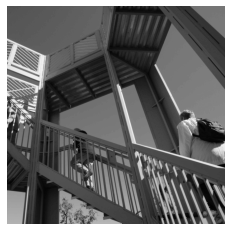

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

In [ ]:
filter = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
# Фильтры края.

#Разные фильтры.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
#filter = np.random.randn(3,3)

# Много разных
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# зададим вес для свертки
weight  = 1

In [ ]:
np.array(filter).shape

(3, 3)

In [ ]:
np.array(filter).T

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

### Свертка

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (I[x - 1, y-1] * filter[0][0])
      convolution = convolution + (I[x, y-1] * filter[0][1])
      convolution = convolution + (I[x + 1, y-1] * filter[0][2])
      convolution = convolution + (I[x-1, y] * filter[1][0])
      convolution = convolution + (I[x, y] * filter[1][1])
      convolution = convolution + (I[x+1, y] * filter[1][2])
      convolution = convolution + (I[x-1, y+1] * filter[2][0])
      convolution = convolution + (I[x, y+1] * filter[2][1])
      convolution = convolution + (I[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=-convolution
      if(convolution>255):
        convolution=255
      I_transformed[x, y] = convolution

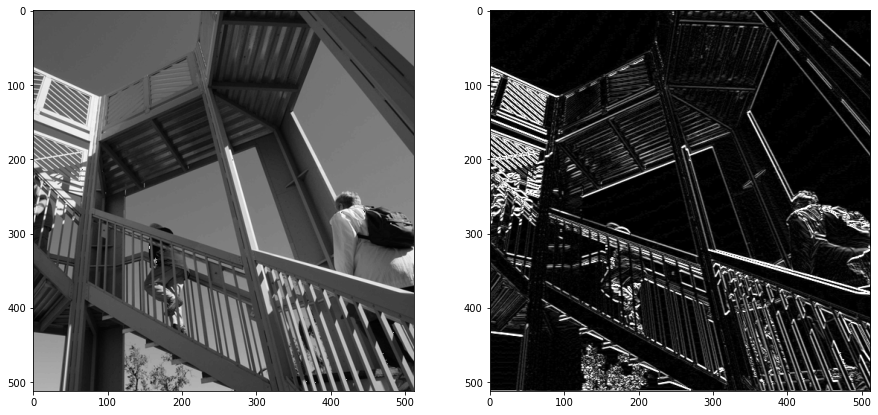

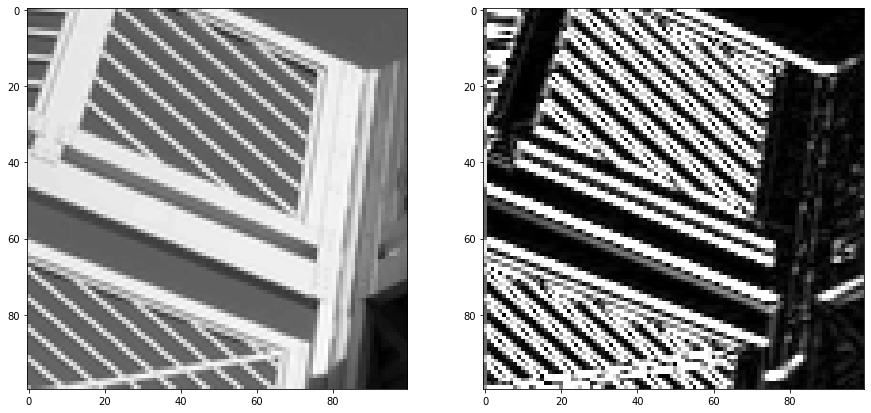

In [ ]:
# Plot the image. 512 by 512
plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(I_transformed)
#plt.axis('off')
plt.show()

ymin,ymax,xmin,xmax = 100,200,0,100

plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(I[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
#plt.axis('off')
plt.show() 

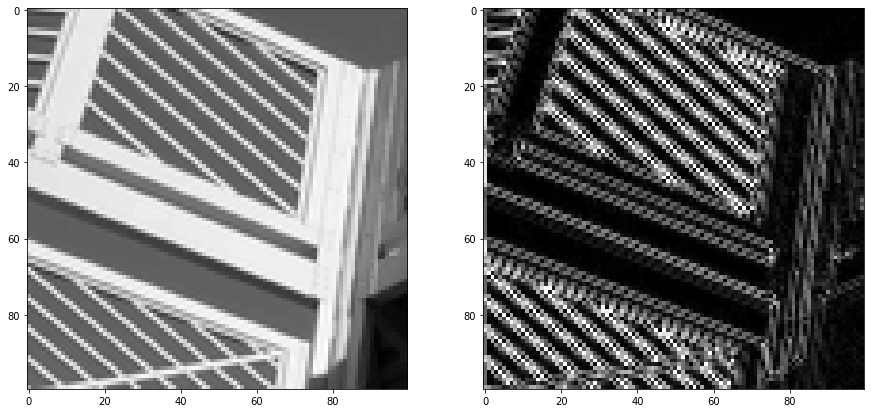

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0

      dI = I[x-1:x+2, y-1: y +2] 
      convolution =np.sum(dI * filter)

      convolution = convolution * weight
      if(convolution<0):
        convolution=- convolution
      if(convolution>255):
        convolution=255
      I_transformed[x, y] = convolution


ymin,ymax,xmin,xmax = 100,200,0,100

plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(I[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
#plt.axis('off')
plt.show()

https://setosa.io/ev/image-kernels/

визуализация фильтров

### Pooling

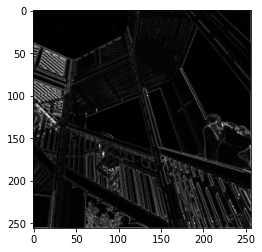

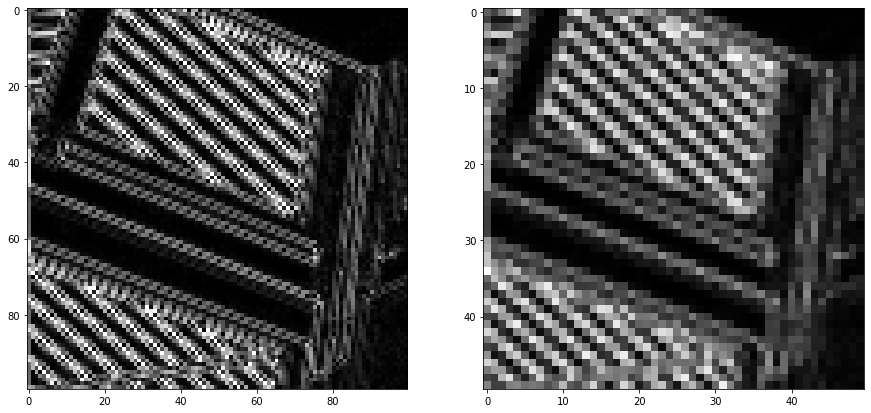

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(I_transformed[x, y])
    pixels.append(I_transformed[x+1, y])
    pixels.append(I_transformed[x, y+1])
    pixels.append(I_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = np.mean(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

ymin,ymax,xmin,xmax = 100,200,0,100

plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(newImage[ymin//2:ymax//2,xmin//2:xmax//2])

#plt.axis('off')
plt.show()

## Пример создания сверточных и пуллинг слоев на Keras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 


from tensorflow.keras.utils import plot_model 

In [ ]:

# определение входных данных(8 массивов с 8 элементами)
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 1, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 1],
		[0, 0, 0, 1, 1, 0, 0, 0]]

data = np.array(data)
data = data.reshape(1, 8, 8, 1)

# создание модели
x_input = Input(shape=(8,8,1))
x_conv = Conv2D(  10,  (3,3),  strides=(1,1)  , activation='relu',padding='valid')(x_input)
x_pool = GlobalMaxPooling2D(  )(x_conv)

model = Model(x_input,x_pool)
model_conv = Model(x_input,x_conv)

# вывод описания созданной модели
model.summary()



Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 10)          100       
                                                                 
 global_max_pooling2d_4 (Glo  (None, 10)               0         
 balMaxPooling2D)                                                
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


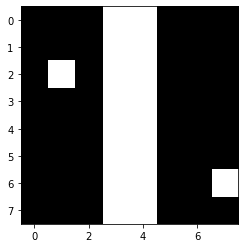

In [ ]:
plt.imshow(data[0,:,:,0])
plt.show()

In [ ]:
hh = model.layers[-2]
hh

In [ ]:
w_old = model.layers[-2].get_weights()
#w_old

In [ ]:
w_old[0].shape

(3, 3, 1, 1)

In [ ]:
# определение дектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.array(detector), np.array([0.0])]

# сохранение весов в модель
model.set_weights(weights)

# применение фильтра к входным данным
ypool = model.predict(data )

print(ypool[0].T)


1/1 [==============================] - 0s 33ms/step
[[[1. 1. 0. 0.]
  [3. 3. 3. 3.]
  [3. 3. 3. 3.]
  [0. 0. 1. 1.]]]


In [ ]:
y_conv = model_conv.predict(data)
print('Входной тензор')
print(data[0].T)
print('Результат свертки')
print(y_conv[0].T)

print('размерность входа',data.shape)
print('размерность входа',y_conv.shape)

1/1 [==============================] - 0s 40ms/step
Входной тензор
[[[0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0]]]
Результат свертки
[[[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 1. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [2. 3. 3. 3. 3. 3. 3. 2.]
  [2. 3. 3. 3. 3. 3. 3. 2.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 1. 1.]]]
размерность входа (1, 8, 8, 1)
размерность входа (1, 8, 8, 1)


In [ ]:
y_conv = model_conv.predict(data)
print('Входной тензор')
print(data[0].T)
print('Результат свертки')
print(y_conv[0].T)

print('размерность входа',data.shape)
print('размерность выхода свертки',y_conv.shape)

print('Результат пулинга')
print(ypool[0].T)
print('размерность выхода пулинга',ypool.shape)

1/1 [==============================] - 0s 15ms/step
Входной тензор
[[[0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0]]]
Результат свертки
[[[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 1. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [2. 3. 3. 3. 3. 3. 3. 2.]
  [2. 3. 3. 3. 3. 3. 3. 2.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 1. 1.]]]
размерность входа (1, 8, 8, 1)
размерность выхода свертки (1, 8, 8, 1)
Результат пулинга
[3.]
размерность выхода пулинга (1, 1)


In [ ]:
# создание модели
x_input = Input(shape=(512,512,1))
x_conv = Conv2D(1, (3,3), padding='same')(x_input)
pool_kernel = 8
strade = pool_kernel
x_pool = MaxPooling2D( pool_size=(pool_kernel,pool_kernel), strides=strade)(x_conv)

model1 = Model(x_input,x_pool)
model_conv1 = Model(x_input,x_conv)



# определение дектора вертикальной линии
detector = [[[[1]],[[-1]],[[-1]]],
            [[[1]],[[-1]],[[-1]]],
            [[[1]],[[-1]],[[-1]]]]
weights = [np.array(detector), np.array([0.0])]

model1.set_weights(weights)

# вывод описания созданной модели
model1.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 512, 512, 1)       10        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 1)        0         
 2D)                                                             
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 36ms/step
Входной тензор


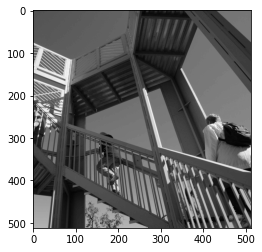

Результат свертки


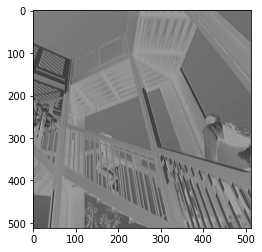

размерность входа (512, 512)
размерность выхода свертки (1, 512, 512, 1)
Результат пулинга


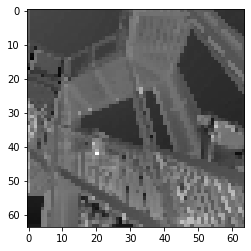

размерность выхода пулинга (1, 64, 64, 1)


In [ ]:

y_conv1 = model_conv1.predict(I.reshape((1,512,512,1))/127-1)
y_pool1 = model1.predict(I.reshape((1,512,512,1))/127-1)
print('Входной тензор')

plt.imshow(I)
plt.show()
print('Результат свертки')
x1 = 0
y1 = 0
plt.imshow((y_conv1[0,x1:,y1:,0])/y_conv1[0].max())
plt.show()

print('размерность входа',I.shape)
print('размерность выхода свертки',y_conv1.shape)

print('Результат пулинга')
x1p = x1 // strade
y1p = y1 // strade
plt.imshow((y_pool1[0,y1p:,x1p:,0])/y_pool1[0].max())
plt.show()
print('размерность выхода пулинга',y_pool1.shape)

 Немного экзотики:

 разбор картинки на части:

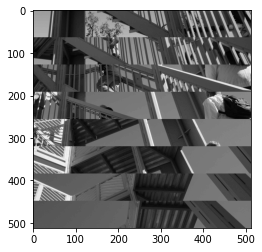

In [ ]:
list_i = []
for i in range(0,511,64):
  crop = tf.image.crop_to_bounding_box(I.reshape((1,512,512,1)), i,0,64,512)
  list_i = [crop]+list_i

I_ = tf.concat(list_i,axis=1)
plt.imshow(I_[0,:,:,0])  

In [ ]:
128*128

16384

In [ ]:
I.shape

(512, 512)

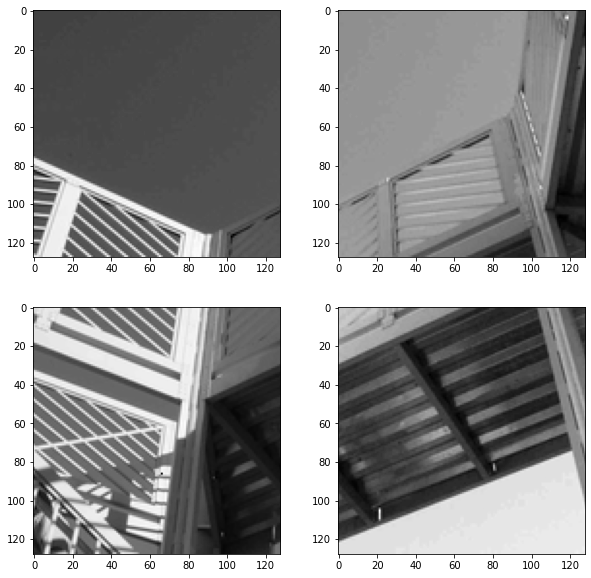

In [ ]:
I_ = tf.expand_dims(I,0) # To create the batch information
I_ = tf.expand_dims(I_,3)
patches = tf.image.extract_patches(images=I_,
                                   sizes=[1, 128, 128, 1],
                                   strides=[1, 128, 128, 1],
                                   rates=[1, 1, 1, 1],
                                   padding='VALID')
plt.figure(figsize=(10, 10))
for imgs in patches:
    count = 0
    for r in range(2):
        for c in range(2):
            ax = plt.subplot(2, 2, count+1)
            plt.imshow(tf.reshape(imgs[r,c],shape=(128,128)).numpy().astype("uint8"))
            count += 1

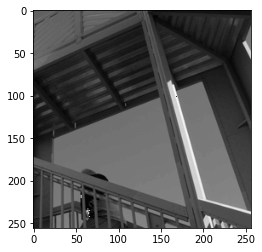

In [ ]:
crop = tf.image.crop_to_bounding_box(I.reshape((1,512,512,1)), 100,100,256,256)

plt.imshow(crop.numpy()[0,:,:,0])

In [ ]:

patch1 = tf.image.extract_patches(images=I.reshape((1,512,512,1)),
                           sizes=[1, 3, 3, 1],
                           strides=[1, 10, 10, 1],
                           rates=[1, 2, 2, 1],
                           padding='SAME')

patch2 = tf.image.extract_glimpse(I.reshape((1,512,512,1)), size=(100, 100), offsets=[[100, 100]],
                        centered=False, normalized=False)

In [ ]:

patch2.shape

TensorShape([1, 100, 100, 1])

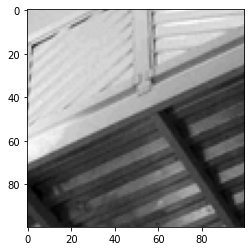

In [ ]:
plt.imshow(patch2[0,:,:,0])
plt.show()

(1, 52, 52, 9)


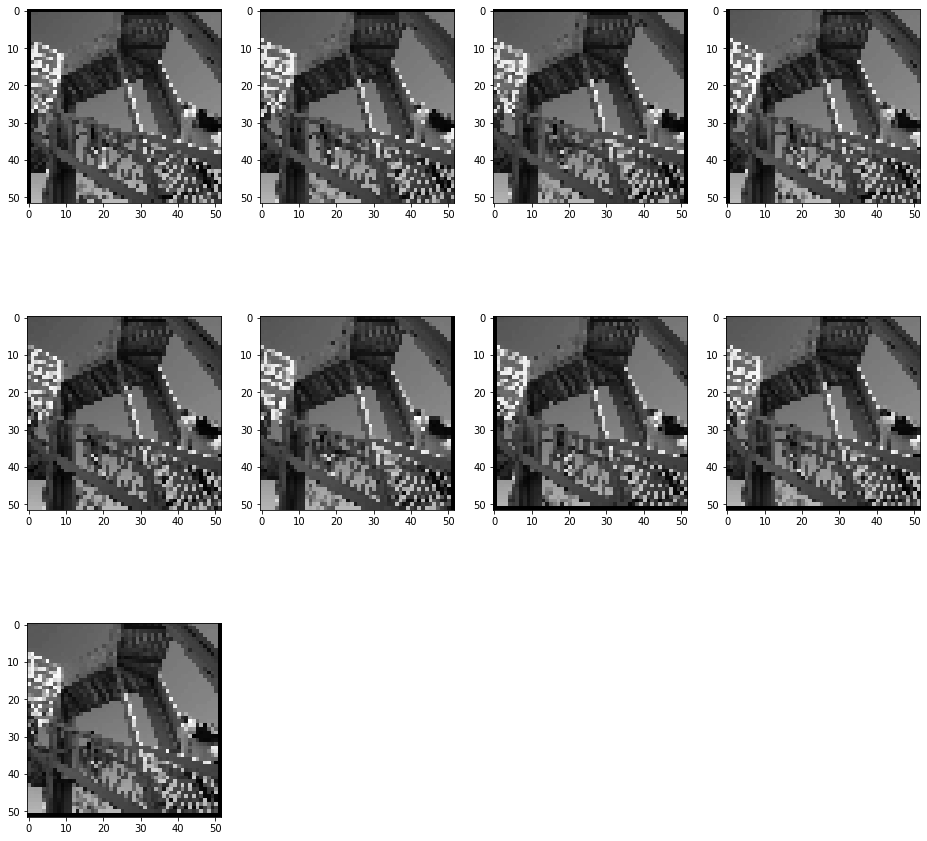

In [ ]:
print(patch1.shape)
plt.figure(figsize = (16,16))
for i in range(patch1.shape[-1]):
  plt.subplot(3,patch1.shape[-1] // 3+1,i+1)
  plt.imshow(patch1[0,:,:,i])
plt.show()

Преобразования: 
FFT - через TF

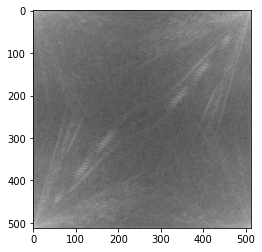

In [ ]:
fft_img = tf.signal.fft3d(I.reshape((1,512,512,1)))

plt.imshow(tf.math.log(tf.math.abs(fft_img)).numpy()[0,:,:,0])
plt.show()

## Нейронная сеть Lenet5.

Lenet5 - это одна из первых сверточных нейронных сетей и она отражает характерные для сверточных нейронных сетей набор элементов - сверточные слои, пуллинг слои и полносвязные слои на конце нейронной сети. Данная архитектура послужила основой для многих современных архитектур сверточных нейронных сетей.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras

# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))




Epoch 1/2
469/469 [==============================] - 3s 5ms/step - loss: 1.3247 - accuracy: 0.6763 - val_loss: 0.5843 - val_accuracy: 0.8566
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.8918
Test loss 0.3968, accuracy 89.18%


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

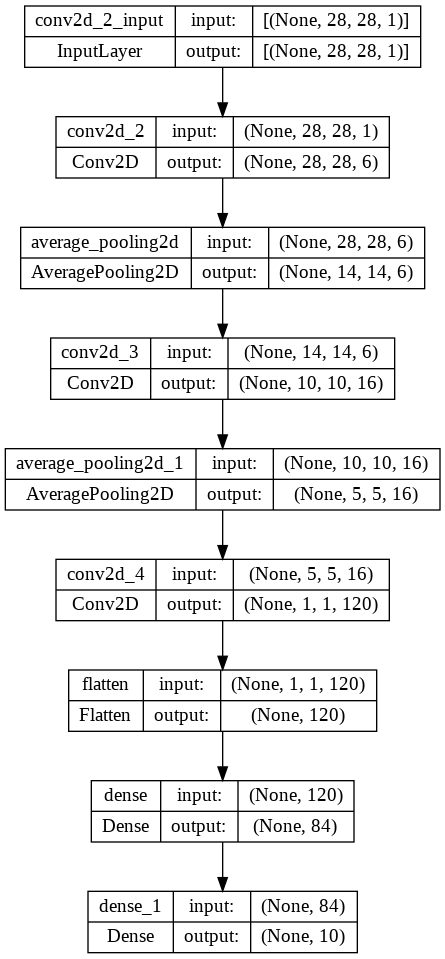

In [ ]:

plot_model(model,'model_sconv.png', show_shapes=True)

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


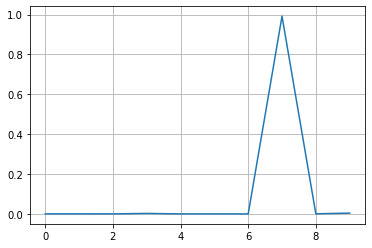

[2.7987512e-04 2.8378787e-04 2.3447436e-04 2.4159425e-03 1.1997349e-04
 8.8883455e-05 7.2311814e-06 9.9197716e-01 6.0412532e-04 3.9886101e-03]


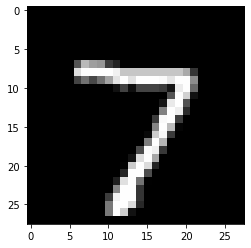

In [ ]:
plt.plot(y_pred[0][:])
plt.grid()
plt.show()
print(y_pred[0][:])
plt.imshow(x_test[0][:,:,0])

plt.show()

Построим примерно такую же сеть через функцианальное описание

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Model 
# инициализация  модели
input1= layers.Input(shape=(28,28,1))
# первый сверточный слой
x1 = layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="same")(input1)

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(1, 1), strides=(2, 2), padding='valid')(x1)

# третий сверточный слой
x3 = layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3)

# пятый  слой
x5 = layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4)

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 
# сделаем несколько промежуточных выходов (через них посмотрим , что происходит в сети) 
model3 = Model(inputs = input1, outputs = x3)
model5 = Model(inputs = input1, outputs = x5)
# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.3014 - accuracy: 0.5956 - val_loss: 0.8583 - val_accuracy: 0.7060
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7417 - accuracy: 0.7347 - val_loss: 0.6959 - val_accuracy: 0.7398
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6398 - accuracy: 0.7639 - val_loss: 0.6347 - val_accuracy: 0.7611
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5911 - accuracy: 0.7799 - val_loss: 0.5987 - val_accuracy: 0.7746
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5580 - accuracy: 0.7945 - val_loss: 0.5756 - val_accuracy: 0.7790
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5323 - accuracy: 0.8065 - val_loss: 0.5484 - val_accuracy: 0.7956
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5111 - accuracy: 0.8168 - val_loss: 0.5317 - val_accuracy: 0.8015
Epoch 

Сделаем предикт для примеров тестов

In [ ]:
model1.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_21 (Conv2D)          (None, 1, 1, 120)         481

In [ ]:
y_pred=model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Подглядываем в третий сверточный слой

In [ ]:
b = model3.predict(x_test)



313/313 [==============================] - 0s 1ms/step


Подглядываем в пятый слой

In [ ]:
b1 = model5.predict(x_test)

313/313 [==============================] - 0s 1ms/step


Содержание внутреннего слоя 

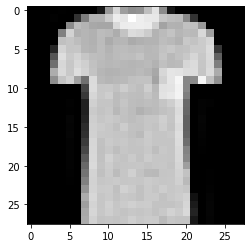

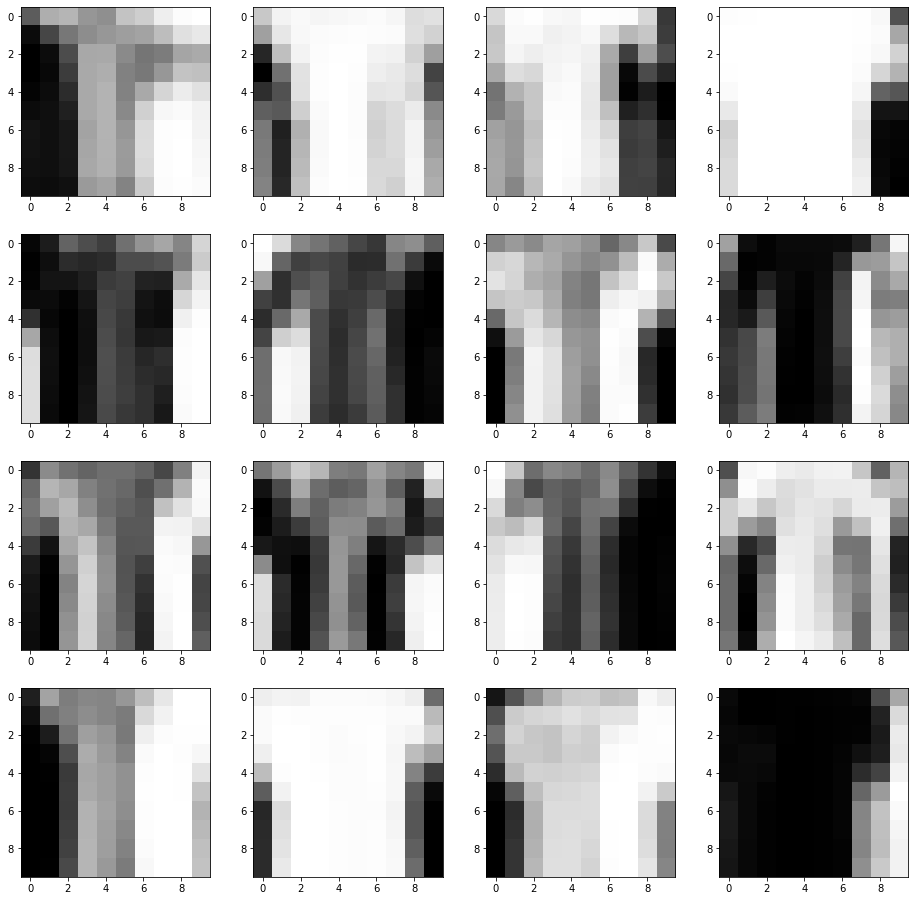

In [ ]:
n = 501
plt.imshow(x_test[n,:,:,0])
plt.show()

plt.figure(figsize=(16,16))
for i in range(4):
  for j in range(4):
    plt.subplot(4,4,i*4+j+1)
    plt.imshow(b[n][:,:,i*4+j])
plt.show()

Сделаем ссылку для обращения к слою

In [ ]:
wg = model5.get_layer(index = -1)

Получим веса слоя

In [ ]:
w_ = wg.get_weights()

Размер ядер слоя

In [ ]:
w_[0].shape

(5, 5, 16, 120)

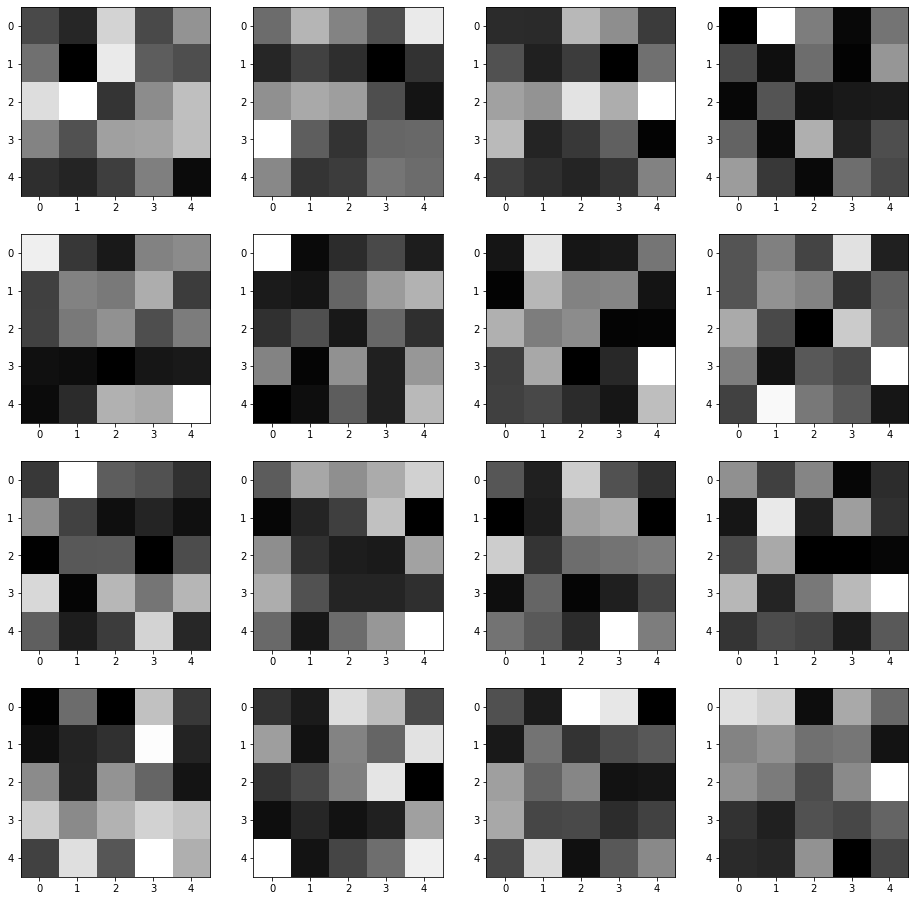

In [ ]:
plt.figure(figsize=(16,16))
for i in range(4):
  for j in range(4):
    plt.subplot(4,4,i*4+j+1)
    plt.imshow(np.abs(w_[0][:,:,i*4+j,0]))
plt.show()

In [ ]:
w_[0][:,:,3*4+3,0]

array([[ 0.05930543,  0.05572423,  0.00415605,  0.04495132, -0.02780477],
       [ 0.03511148,  0.03856251,  0.02998149,  0.03161088,  0.00556136],
       [-0.03873301, -0.03286546, -0.02055893, -0.03684086, -0.06753076],
       [ 0.01374423, -0.00936874,  0.02179767,  0.01920908, -0.02678967],
       [-0.0115546 ,  0.0107122 , -0.03895595, -0.00055333,  0.01862497]],
      dtype=float32)

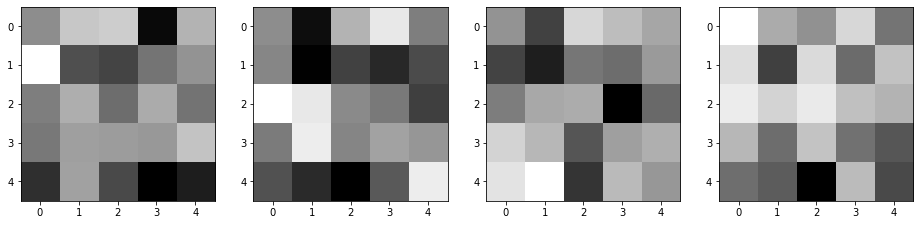

In [ ]:
plt.figure(figsize=(16,4))
for i in range(1):
  for j in range(4):
    plt.subplot(1,4,j+1)
    plt.imshow((w_[0][:,:,0,3*4+j]))
plt.show()

In [ ]:
model1.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 120)         481



## **Сложные конструкции из простых слоев**

Слой для объединения

https://keras.io/api/layers/merging_layers/concatenate/

In [ ]:

from tensorflow.keras.layers import Dense, Flatten, Concatenate

from tensorflow.keras.utils import plot_model 


Строим сеть из трех нитей

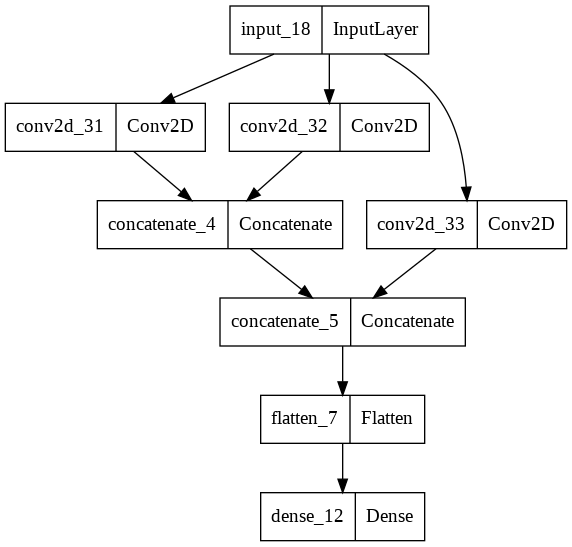

In [ ]:
first_input = Input(shape=(28,28,1 ))
x11= Conv2D(16,3,activation='relu',padding = 'same')(first_input)
#x11= Flatten()(x11)
first_dense = x11# Dense(10, )(x11)

#second_input = Input(shape=(28,28,1 ))
x22= Conv2D(16,5,activation='relu',padding = 'same')(first_input)
#x22= Flatten()(x22)
second_dense = x22 #Dense(10, )(x22)

merge_one = Concatenate(  axis =-1 )([first_dense, second_dense])

third_input = Input(shape=(28,28,1 ))
x33= Conv2D(16,1,activation='relu',padding = 'same')(first_input)
#x33= Flatten()(x33)
#x33 = Dense(10, )(x33)
merge_two1 = Concatenate(axis = -1)([merge_one, x33])
merge_two= Flatten()(merge_two1)
merge_two=Dense(10, activation='softmax')(merge_two)

model_stek = Model(inputs=first_input, outputs=merge_two)
#model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek,'model_stek.png')



In [ ]:
model_stek.summary()

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_31 (Conv2D)             (None, 28, 28, 16)   160         ['input_18[0][0]']               
                                                                                                  
 conv2d_32 (Conv2D)             (None, 28, 28, 16)   416         ['input_18[0][0]']               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 28, 28, 32)   0           ['conv2d_31[0][0]',              
                                                                  'conv2d_32[0][0]']       

In [ ]:
#hist = model_stek.fit([x_train,x_train,x_train],y_train, epochs = 5, validation_split=0.2)
hist = model_stek.fit(x_train,y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4731 - accuracy: 0.8446 - val_loss: 0.3474 - val_accuracy: 0.8777
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3072 - accuracy: 0.8917 - val_loss: 0.2994 - val_accuracy: 0.8953
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2623 - accuracy: 0.9074 - val_loss: 0.2914 - val_accuracy: 0.9002
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2340 - accuracy: 0.9155 - val_loss: 0.2775 - val_accuracy: 0.9006
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2103 - accuracy: 0.9245 - val_loss: 0.2718 - val_accuracy: 0.9062


# **Дополнительные варианты сетевых модулей**

## Dropout - исключение заданного числа нейронов


Метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных адаптаций отдельных нейронов на тренировочных данных во время обучения.

Характеризует исключение определённого процента (например 50%) случайных нейронов на разных итерациях во время обучения нейронной сети. В результате  обучение происходит более общее, нет надежды на определенные нейроны. Такой приём значительно увеличивает скорость обучения, качество обучения на тренировочных данных, а также повышает качество предсказаний модели на новых тестовых данных.

На моменте предсказания все нейроны включаются обратно, dropout не используется.

<img src="https://drive.google.com/uc?export=view&id=1UP-yYkA4UEfZmdFUZG-3ccftXPQcfno1">



## BatchNorm


Batch Normalization (Пакетная нормализация) — метод, который позволяет повысить производительность и стабилизировать работу искусственных нейронных сетей. Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое мат. ожидание и единичную дисперсию.

Batch norm дает следующие эффекты:

- ускорение сходимости модели;
- бОльшая независимость обучения каждого слоя нейронов;
- в некоторой степени предотвращает эффект переобучения;
- меньшая чувствительность к начальной инициализации весовых коэффициентов.


<img src='https://drive.google.com/uc?export=view&id=1y0ye2bQTB2cwgP4cgxVQ50Fhi8FvIZeH'>

Получается, что нейронам в одной сети приходится адаптироваться к разным картинкам на разных итерациях, потому что разные статистические показатели распределений приходят на вход, из-за чего снижается скорость сходимости, чтобы это было легче для сети, можно выполнять нормализацию батча.

Получается, что нужно нормировать статистические показатели. 
<img src="https://drive.google.com/uc?export=view&id=1kd0XCd5FSPoVR1tlD3HfA2Nc5mwdWtj1" width=400>


<img src='https://drive.google.com/uc?export=view&id=11YY3T8a31W583tJHxz-Sq7Q7A3Z02a47'>


<h2>$z^i_k = \frac{v^i_k + \mu_v}{\sqrt{ \sigma^2_v+ \epsilon}}$</h2><br>
$y_i^k = \gamma z_i^k + \beta$, где $\gamma$ и $\beta$ - это настраиваемые параметры, которые нужны для дополнительного масштабирования и смещения.








# **Проблемы Сверточных сетей**

Сверточные нейронные сети - эффективно решают задачи распознавания
Однако для свертка линейное преобразование:
 - Градиент затухает
 - Глубина для решения задач ограничена
 - Ограничение глубины = ограничению размера задач


### Деградация глубоких сетей

In [ ]:
#!pip install tensorflow==2.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2

from time import time
import tensorflow


In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# откроем данные из cifar10
cifar10 = tensorflow.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = \
    cifar10.load_data()

train_labels = tensorflow.keras.utils.to_categorical(train_labels,10)
test_labels = tensorflow.keras.utils.to_categorical(test_labels,10)

IMG_SIZE = (32, 32, 3)
BATCH_SIZE = 32


170500096/170498071 [==============================] - 4s 0us/step


Большой размер сети позволяет решать сложные задачи. Посмотрим на работу внутренних слоев сети

Сделаем  большую нейронную сеть. Будем обучать ее на данных из MNIST

Однако, проследим за изменениями градиента вдоль всей модели. Оценим как изменяется значение градиента ошибки вдоль сети и вдоль эпох. Для этого используем механизм вычисления градиента TensorFlow  tensorflow.GradientTape() (https://www.tensorflow.org/api_docs/python/tf/GradientTape)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout,Conv2D, MaxPool2D, Flatten


In [ ]:
# Получим данные из стандартного датасета
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28,28,1).astype('float32') / 255 
x_test = x_test.reshape(10000, 28,28,1).astype('float32') / 255 
y_train = y_train.astype('int') 
y_train = tensorflow.keras.utils.to_categorical(y_train,10)
y_test = y_test.astype('int') 
y_test = tensorflow.keras.utils.to_categorical(y_test,10)
# Зарезервируем 10,000 примеров для валидации 
x_val = x_train[-10000:] 
y_val = y_train[-10000:] 
x_train = x_train[:-10000] 
y_train = y_train[:-10000]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:


# собираем сеть
inputs = Input(shape=(28,28,1), name='digits') 
x = Conv2D(64,3, activation='relu', name='conv_1')(inputs)
x = Conv2D(64,3, activation='relu', name='conv_2')(x) 
# можно добавлять блоки сверток, но следует следить за размером
# padding ='valid' - размер выходов постепенно уменьшается 
x = Conv2D(64,3, activation='relu', name='conv_31')(x) 
x = Conv2D(64,3, activation='relu', name='conv_41')(x)  
# нелинейная трансформация и уменьшение размера в 2 раза
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x) 
x = Conv2D(64,3, activation='relu', name='conv_32')(x) 
x = Conv2D(64,3, activation='relu', name='conv_42')(x)  

x = Conv2D(64,3, activation='relu', name='conv_3')(x) 
x = Conv2D(64,3, activation='relu', name='conv_4')(x)  
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(64, activation='relu', name='dense_1')(x) 
outputs = Dense(10, activation='sigmoid' ,name='predictions')(x) 
model = Model(inputs=inputs, outputs=outputs) 
# Создадим экземпляр оптимизатора. 
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=1e-3) 
# Instantiate a loss function. 
loss_fn = tensorflow.keras.losses.MeanSquaredError() #(from_logits=True) 
# Подготовим тренировочный датасет. 
batch_size = 64 
train_dataset = tensorflow.data.Dataset.from_tensor_slices((x_train, y_train)) 
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size) 
# Итерируем по эпохам.
grad_log=[]
w_log=[]
epochs=2  # учим немного, т.к. задача посмотреть , что происходит с градиентом
for epoch in range(epochs): 
  print('Начинаем эпоху %d' % (epoch,)) 
  # Итерируем по пакетам в датасете. 
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset): 
    # Откроем GradientTape чтобы записать операции # выполняемые во время прямого прохода, 
    #включающего автодифференцирование. 
    with tensorflow.GradientTape() as tape: 
      # Запустим прямой проход слоя. 
      # Операции применяемые слоем к своим 
      # входным данным будут записаны 
      # на GradientTape. 
      logits = model(x_batch_train) 
      # Logits для пакета  - выходы модели 
      # Вычислим значение потерь для этого пакета. 
      y_s=y_batch_train.numpy().shape
      y  = tensorflow.reshape( y_batch_train,shape=(y_s[0],10,1))
      l = tensorflow.reshape( logits,shape=(y_s[0],10,1))
      # вызываем лосс
      loss_value = loss_fn(y, l) 
      # Используем gradient tape для автоматического извлечения градиентов 
      # обучаемых переменных относительно потерь. 
      grads = tape.gradient(loss_value, model.trainable_weights) 
      g_g=[]
      w_w =[]
      # пишем логи для сохранения значений градиента и веса по одной цепи 
      # (0-й канал распространения активности)
      for g_s in grads:
        if len(g_s.numpy().shape)==1:
         
          g_g.append(g_s.numpy()[0])
        if len(g_s.numpy().shape)==2:
          
          g_g.append(g_s.numpy()[0,0]) 
        if len(g_s.numpy().shape)==3:
          
          g_g.append(g_s.numpy()[0,0,0]) 
        if len(g_s.numpy().shape)==4:
          
          g_g.append(g_s.numpy()[0,0,0,0])  

      for w_s in model.trainable_weights:
        if len(w_s.numpy().shape)==1:
          w_w.append(w_s.numpy()[0])
          
        if len(w_s.numpy().shape)==2:
          w_w.append(w_s.numpy()[0,0])
          
        if len(w_s.numpy().shape)==3:
          w_w.append(w_s.numpy()[0,0,0])
         
        if len(w_s.numpy().shape)==4:
          w_w.append(w_s.numpy()[0,0,0,0])
              
      # добавляем текущие логи по слоям к общей записи
      grad_log.append(g_g)
      w_log.append(w_w)
      # Выполним один шаг градиентного спуска обновив # значение переменных минимизирующих потери. 
      optimizer.apply_gradients(zip(grads, model.trainable_weights)) 
      # Пишем лог каждые 200 пакетов. 
      if step % 200 == 0: 
        print('Потери на обучении (для одного пакета) на шаге %s: %s' % (step, float(loss_value))) 
        print('Уже увидели: %s примеров' % ((step + 1) * batch_size))
grad_log=np.array(grad_log)
w_log=np.array(w_log)


Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.24986226856708527
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.24840068817138672
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.24717238545417786
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.24577665328979492
Уже увидели: 38464 примеров
Начинаем эпоху 1
Потери на обучении (для одного пакета) на шаге 0: 0.2444661557674408
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.2435086965560913
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.24206490814685822
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.24034428596496582
Уже увидели: 38464 примеров


Посмотрим на то, как текущая сеть обрабатывает свои примеры. Посмотрим на карту градиентов по фильтрам из сверток и изображения, пропускаемые через слой. Поскольку активационные функции тоже попадают в лог градиентов, то для нас интересны не все номера слоев. берем только сверточные (2, 4,6, 8,10)

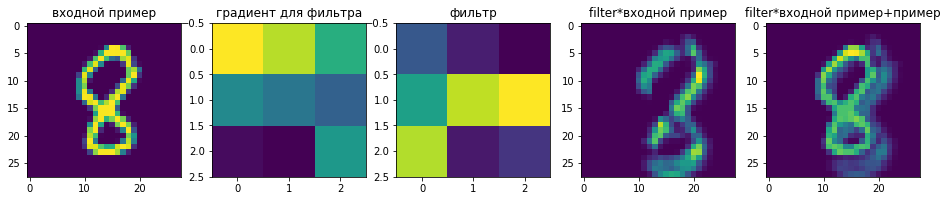

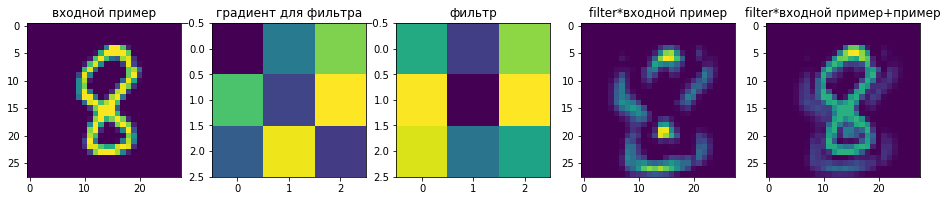

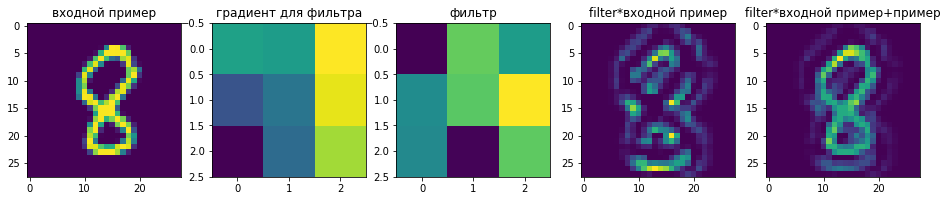

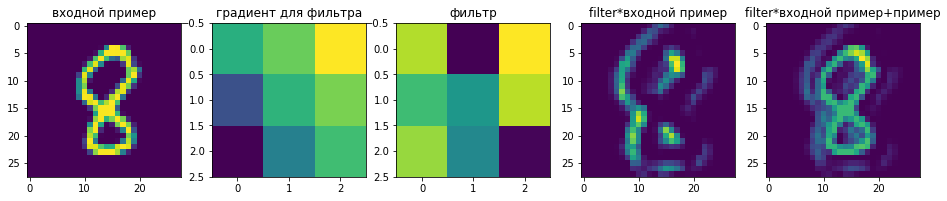

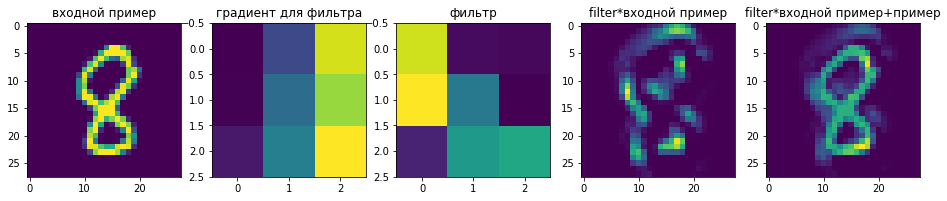

In [ ]:
numb_layer = 2

h = Model(inputs,model.layers[numb_layer].output)
h.compile(loss = loss_fn ,optimizer = optimizer)
out_layers=h.predict(x_batch_train)

gr_=grads[numb_layer].numpy()
w_ = model.trainable_weights[numb_layer].numpy()
gr_len = gr_.shape[2]
if gr_.shape[2]>5:
  gr_len =5
for i in range(gr_len):
  heatmap = np.abs(gr_[:,:,i,1])
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img=x_batch_train.numpy()[-1,:,:,0]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  out_l = cv2.resize(out_layers[-1,:,:,i], (img.shape[1], img.shape[0]))
  out_l /=np.max(out_l) 
  out_l = np.uint8(255 * out_l)

  w_l = cv2.resize(np.abs(w_[:,:,i,1]), (img.shape[1], img.shape[0]))
  w_l /=np.max(w_l) 
  w_l = np.uint8(255 * w_l)

  superimposed_img = heatmap * 0.4 + 0.6 * w_l
  superimposed_img_l = out_l * 0.4 + 0.6 * img*255
  plt.figure(figsize=(16,4))
  plt.subplot(1,5,1)
  plt.title('входной пример')
  plt.imshow(img)
  plt.subplot(1,5,2)
  plt.title('градиент для фильтра')
  plt.imshow(gr_[:,:,i,1])
  plt.subplot(1,5,3)
  plt.title('фильтр')
  plt.imshow(w_[:,:,i,1])
  plt.subplot(1,5,4)
  plt.title('filter*входной пример')
  plt.imshow(out_l)
  plt.subplot(1,5,5)
  plt.title('filter*входной пример+пример')
  plt.imshow(superimposed_img_l)
  plt.show()

Посмотрим как изменяется градиент от эпох обучения

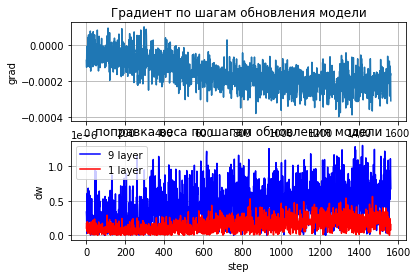

In [ ]:
# покажем сохраненные логи для градиента на слое 0 ( за входным) по всем эпохам
plt.subplot(2,1,1)
plt.plot(grad_log[:,0])
plt.title('Градиент по шагам обновления модели')
plt.xlabel('step')
plt.ylabel('grad')
plt.grid()
plt.subplot(2,1,2)

# и сравним градиентпо двум слоям (синий ближе к выходу (9-й), красный - начальный (1-я свертка))
plt.plot(np.abs(w_log[1:,9]-w_log[:-1,9]),'b',label='9 layer')
plt.plot(np.abs(w_log[1:,1]-w_log[:-1,1]),'r',label='1 layer')
plt.title('поправка веса по шагам обновления модели')
plt.xlabel('step')
plt.ylabel('dw')
plt.legend()
plt.grid()
plt.show()

А вот, что происходит при большом числе эпох. Градиент маленький и практически постоянного диапазона 

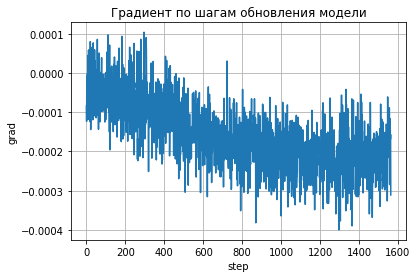

In [ ]:
plt.plot(grad_log[:,0])
plt.title('Градиент по шагам обновления модели')
plt.xlabel('step')
plt.ylabel('grad')
plt.grid()
plt.show()

А теперь посмотрим, что идет по слоям. Градиент резко падает уже на глубине 2-го рабочего слоя (не на слое  активационнаой функции, где нет обработки)

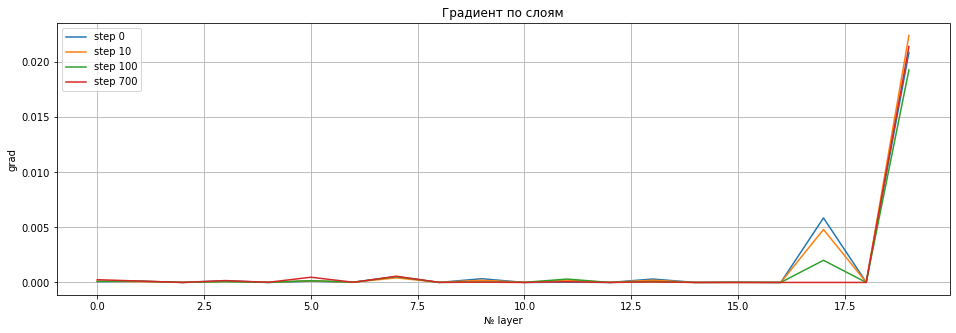

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.plot(np.abs(grad_log[700,:]),label='step 700')
plt.legend()
plt.show()

Посмотрим на начальные слои 

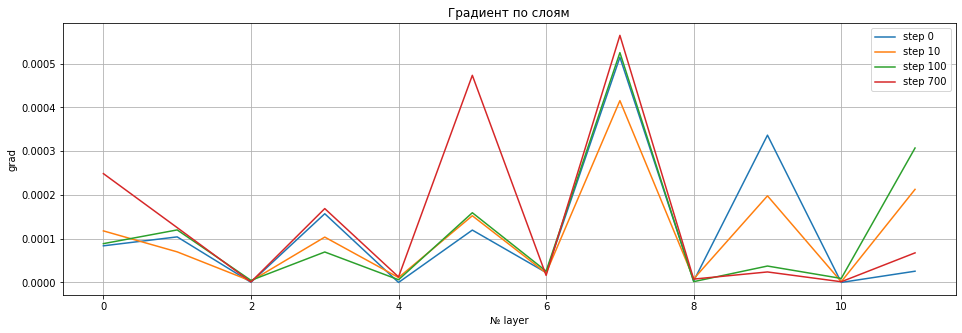

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:-8]),label='step 0')
plt.plot(np.abs(grad_log[10,:-8]),label='step 10')
plt.plot(np.abs(grad_log[100,:-8]),label='step 100')
plt.plot(np.abs(grad_log[700,:-8]),label='step 700')
plt.legend()
plt.show()

Посмотрим на поправки весов по слоям. Естественно, что онии ведут себя аналогично

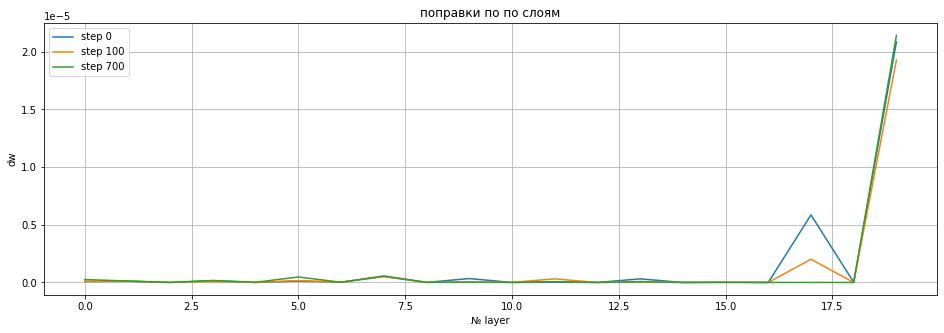

In [ ]:
plt.figure(figsize=(16,5))
plt.title('поправки по по слоям')
plt.xlabel('№ layer')
plt.ylabel('dw')
plt.grid()
plt.plot(np.abs(w_log[0,:]-w_log[1,:]),label='step 0')
plt.plot(np.abs(w_log[100,:]-w_log[101,:]),label='step 100')
plt.plot(np.abs(w_log[700,:]-w_log[701,:]),label='step 700')

plt.legend()
plt.show()

И даже при большей глубине обучения значения градиента и поправок к весам ведут себя аналогично 

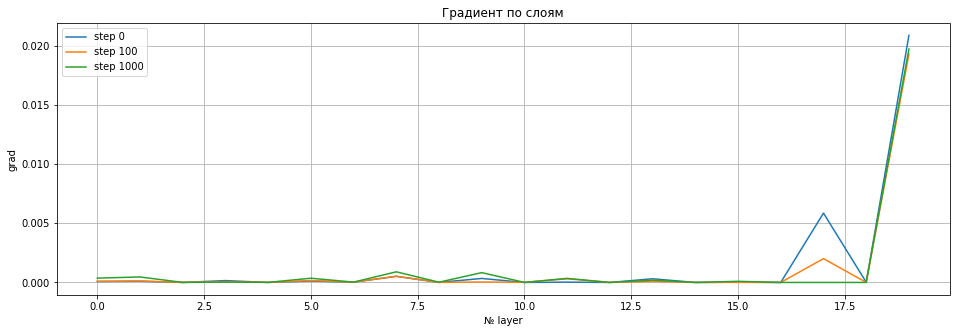

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),label='step 0')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.plot(np.abs(grad_log[1000,:]),label='step 1000')
#plt.plot(np.abs(grad_log[7000,:]),label='step 7000')
plt.legend()
plt.show()

Начальные слои для большой глубины обучения

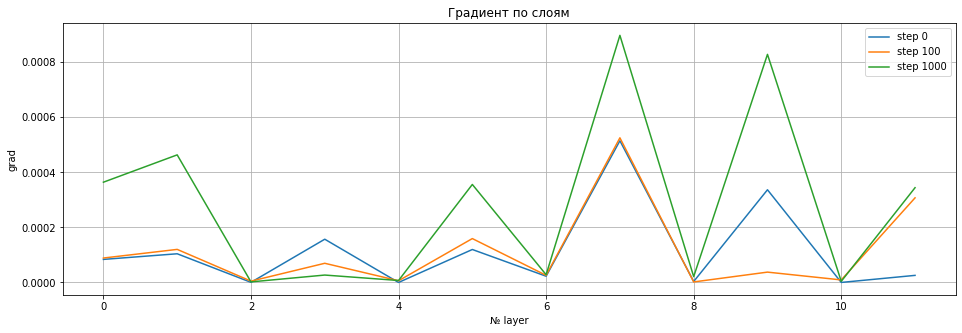

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:-8]),label='step 0')
plt.plot(np.abs(grad_log[100,:-8]),label='step 100')
plt.plot(np.abs(grad_log[1000,:-8]),label='step 1000')
#plt.plot(np.abs(grad_log[7000,:-8]),label='step 7000')
plt.legend()
plt.show()

Сделаем функцию для обучения и контроля модели

In [ ]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28,28,1).astype('float32') / 255 
x_test = x_test.reshape(10000, 28,28,1).astype('float32') / 255 
y_train = y_train.astype('int') 
y_train = tensorflow.keras.utils.to_categorical(y_train,10)
y_test = y_test.astype('int') 
y_test = tensorflow.keras.utils.to_categorical(y_test,10)
# Зарезервируем 10,000 примеров для валидации 
x_val = x_train[-10000:] 
y_val = y_train[-10000:] 
x_train = x_train[:-10000] 
y_train = y_train[:-10000]

# Создадим экземпляр оптимизатора. 
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=1e-3) 
# Instantiate a loss function. 
loss_fn = tensorflow.keras.losses.MeanSquaredError() #берем, т.к. виднее изменения(from_logits=True) 
# Подготовим тренировочный датасет. 
batch_size = 64 
epochs=2  # учим немного, т.к. задача посмотреть , что происходит с градиентом
train_dataset = tensorflow.data.Dataset.from_tensor_slices((x_train, y_train)) 
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size) 

def my_train(model=None, epochs=None,batch_size=64,train_dataset=train_dataset ):
  # Итерируем по эпохам.
  grad_log=[]
  w_log=[]


  for epoch in range(epochs): 
    print('Начинаем эпоху %d' % (epoch,)) 
    # Итерируем по пакетам в датасете. 
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset): 
      # Откроем GradientTape чтобы записать операции # выполняемые во время прямого прохода, 
      #включающего автодифференцирование. 
      with tensorflow.GradientTape() as tape: 
        # Запустим прямой проход слоя. 
        # Операции применяемые слоем к своим 
        # входным данным будут записаны 
        # на GradientTape. 
        logits = model(x_batch_train) 
        # Logits для пакета  - выходы модели 
        # Вычислим значение потерь для этого пакета. 
        y_s=y_batch_train.numpy().shape
        y  = tensorflow.reshape( y_batch_train,shape=(y_s[0],10,1))
        l = tensorflow.reshape( logits,shape=(y_s[0],10,1))
        # вызываем лосс
        loss_value = loss_fn(y, l) 
        # Используем gradient tape для автоматического извлечения градиентов 
        # обучаемых переменных относительно потерь. 
        grads = tape.gradient(loss_value, model.trainable_weights) 
        g_g=[]
        w_w =[]
        # пишем логи для сохранения значений градиента по одному ядру из слоя (осредняем по абсолютным значениям) и 
        # веса по одной цепи (0-й канал распространения активности)
        for g_s in grads:
          if len(g_s.numpy().shape)==1:
         
            g_g.append(g_s.numpy()[0])
          if len(g_s.numpy().shape)==2:
          
            g_g.append(np.mean(np.abs((g_s.numpy()[:,0])))) 
          if len(g_s.numpy().shape)==3:
          
            g_g.append(np.mean(np.abs(g_s.numpy()[:,:,0]))) 
          if len(g_s.numpy().shape)==4:
          
            g_g.append(np.mean(np.abs(g_s.numpy()[:,:,0,0])) ) 

        for w_s in model.trainable_weights:
          if len(w_s.numpy().shape)==1:
            w_w.append(w_s.numpy()[0])
          if len(w_s.numpy().shape)==2:
            w_w.append(w_s.numpy()[0,0])
          
          if len(w_s.numpy().shape)==3:
            w_w.append(w_s.numpy()[0,0,0])
         
          if len(w_s.numpy().shape)==4:
            w_w.append(w_s.numpy()[0,0,0,0])
              
        # добавляем текущие логи по слоям к общей записи
        grad_log.append(g_g)
        w_log.append(w_w)
        # Выполним один шаг градиентного спуска обновив # значение переменных минимизирующих потери. 
        optimizer.apply_gradients(zip(grads, model.trainable_weights)) 
        # Пишем лог каждые 1000 пакетов. 
        if step % 1000 == 0: 
          print('Потери на обучении (для одного пакета) на шаге %s: %s' % (step, float(loss_value))) 
          print('Уже увидели: %s примеров' % ((step + 1) * batch_size))
  grad_log=np.array(grad_log)
  w_log=np.array(w_log)
  return grad_log, w_log, model, x_batch_train

Сделаем функцию для отображения протекающих градиентов, где введем нормирование. Градиент на выходе сети берем за 1. Все остальные нормируем по этому значению (сделано для удобства оценки скорости падения градиента в сети) 

In [ ]:
def visual_grad(grad_log=None, numb_layer=-1):
  s_g = grad_log.shape
  grad_log=grad_log/np.max(grad_log,axis=1).reshape((s_g[0],1))
  #print(grad_log[0,:])
  plt.figure(figsize=(16,5))
  plt.title('Градиент по слоям')
  plt.xlabel('№ layer')
  plt.ylabel('grad')
  plt.grid()
  plt.plot(np.abs(grad_log[0,:numb_layer]),label='step 0')
  plt.plot(np.abs(grad_log[s_g[0] // 10,:numb_layer]),label='step '+str(s_g[0] // 10))
  plt.plot(np.abs(grad_log[s_g[0] // 3,:numb_layer]),label='step '+str(s_g[0] // 3))
  plt.plot(np.abs(grad_log[s_g[0]-1 ,:numb_layer]),label='step  '+str(s_g[0] ))
  plt.legend()
  plt.show()

Проверяем модель и функции обработки и отображения. И немного увеличиваем сеть (проверим, как это будет с градиентом)

In [ ]:

# собираем сеть
inputs = Input(shape=(28,28,1), name='digits') 
x = Conv2D(64,3, activation='relu', name='conv_1')(inputs)
x = Conv2D(64,3, activation='relu', name='conv_2')(x) 
# можно добавлять блоки сверток, но следует следить за размером
# padding ='valid' - размер выходов постепенно уменьшается 
x = Conv2D(64,3, activation='relu', padding='same',name='conv_31')(x) 
x = Conv2D(64,3, activation='relu', padding='same',name='conv_41')(x)  
# нелинейная трансформация и уменьшение размера в 2 раза
x = MaxPool2D()(x) 
x = Conv2D(64,3, activation='relu', name='conv_32')(x) 
x = Conv2D(64,3, activation='relu', name='conv_42')(x)
x = Conv2D(64,3, activation='relu', padding='same',name='conv_33')(x) 
x = Conv2D(64,3, activation='relu', padding='same',name='conv_43')(x)    

x = Conv2D(64,3, activation='relu', name='conv_3')(x) 
x = Conv2D(64,3, activation='relu', name='conv_4')(x)  
x = MaxPool2D((2,2),(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu', name='dense_1')(x) 
 

outputs = Dense(10,activation='sigmoid' , name='predictions')(x) 
model1 = Model(inputs=inputs, outputs=outputs) 

grad_log,w_log,model1, x_batch_train= my_train( model=model1, epochs=1,batch_size=batch_size , train_dataset=train_dataset)


Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.24975323677062988
Уже увидели: 64 примеров


Градиент уверенно падает с огромной скростью. На начальных слоях практически нет активности.

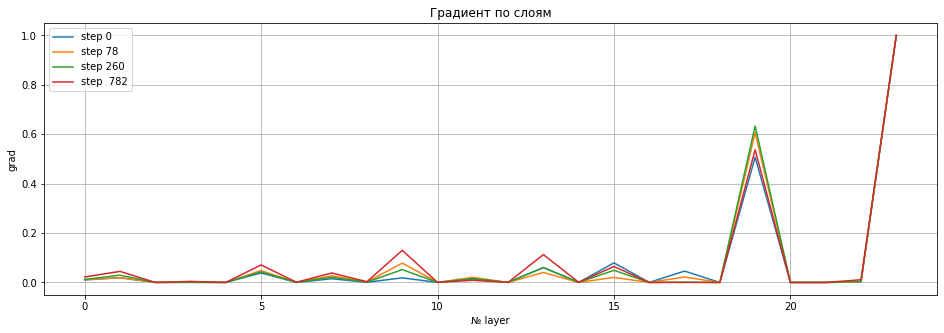

In [ ]:
visual_grad(grad_log=grad_log, numb_layer=grad_log.shape[1])


## Inception, ResNet


ResNet - блок

In [ ]:
from tensorflow.keras.layers import Add , BatchNormalization


inputs = Input(shape=(28,28,1), name='digits') 

x = Conv2D(64,3, activation='relu', name='conv_1')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64,3, activation='relu', name='conv_2')(x) 
# можно добавлять блоки сверток, но следует следить за размером
# padding ='valid' - размер выходов постепенно уменьшается 
#ResNet - блок
x_shortcut = x
x = Conv2D(64,3, activation='relu', padding='same',name='conv_31')(x) 
x = Conv2D(64,3, activation='relu', padding='same',name='conv_41')(x) 
x = Add()([x, x_shortcut])
x = BatchNormalization()(x)
# нелинейная трансформация и уменьшение размера в 2 раза
x = MaxPool2D()(x) 
x_shortcut = x
x = Conv2D(64,3, activation='relu', padding='same', name='conv_32')(x) 
x = Conv2D(64,3, activation='relu', padding='same', name='conv_42')(x)
x = Add()([x, x_shortcut])
x = BatchNormalization()(x)
x_shortcut = x
x = Conv2D(64,3, activation='relu', padding='same',name='conv_33')(x) 
x = Conv2D(64,3, activation='relu', padding='same',name='conv_43')(x)  
x = Add()([x, x_shortcut])  
x = BatchNormalization()(x)
x_shortcut = x
x = Conv2D(64,3, activation='relu', padding='same', name='conv_3')(x) 
x = Conv2D(64,3, activation='relu',  padding='same', name='conv_4')(x)
x = Add()([x, x_shortcut])  
x = MaxPool2D((2,2),(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu', name='dense_1')(x) 
 

outputs = Dense(10,activation='sigmoid' ,name='predictions')(x) 
model1 = Model(inputs=inputs, outputs=outputs) 

grad_log,w_log,model1, x_batch_train= my_train( model=model1, epochs=1,batch_size=batch_size , train_dataset=train_dataset)


Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.25007301568984985
Уже увидели: 64 примеров


Отличный уровень градиента. Теперь можем строить очень длинную сеть

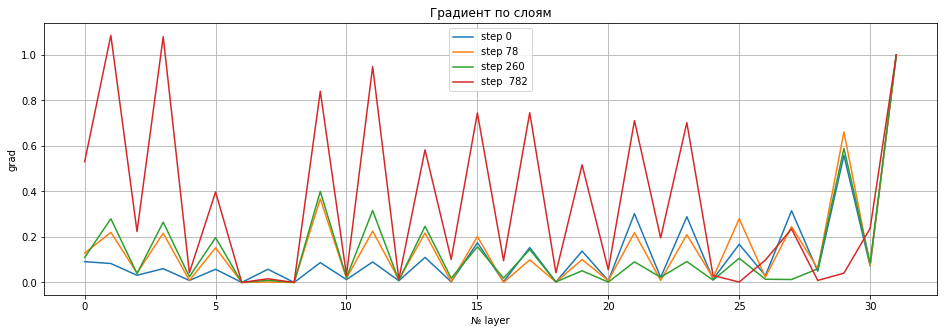

In [ ]:
visual_grad(grad_log=grad_log, numb_layer=grad_log.shape[1])

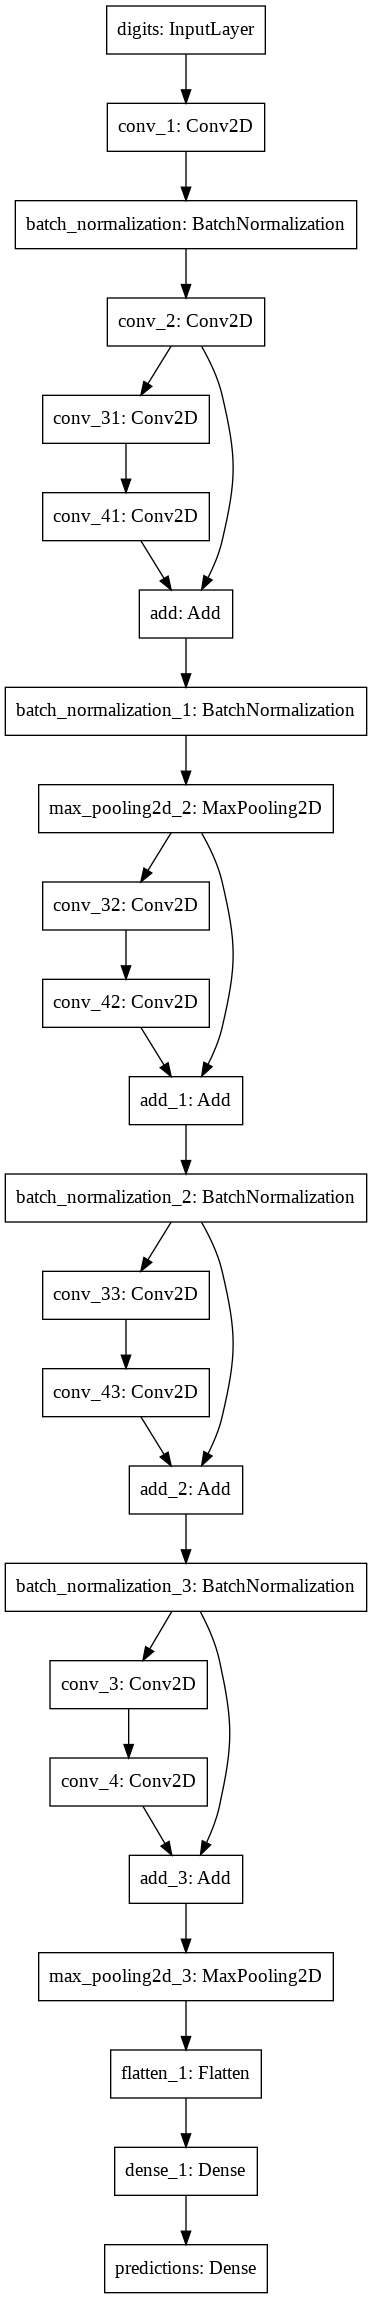

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model1, 'tt.png')

In [ ]:
from tensorflow.keras.layers import concatenate 


inputs = Input(shape=(28,28,1), name='digits') 

x = Conv2D(64,3, activation='relu', name='conv_1')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64,3, activation='relu', name='conv_2')(x) 
# можно добавлять блоки сверток, но следует следить за размером
# padding ='valid' - размер выходов постепенно уменьшается 
#Inception - блок
x_shortcut = x
x0 = Conv2D(64,1, activation='relu', padding='same',name='conv_131')(x) 
x1 = Conv2D(64,1, activation='relu', padding='same',name='conv_231')(x) 
x1 = Conv2D(64,5, activation='relu', padding='same',name='conv_341')(x1) 
x2 = Conv2D(64,1, activation='relu', padding='same',name='conv_431')(x) 
x2 = Conv2D(64,3, activation='relu', padding='same',name='conv_541')(x2) 
x3 = Conv2D(64,3, activation='relu', padding='same',name='conv_631')(x) 
x3 = Conv2D(64,1, activation='relu', padding='same',name='conv_741')(x3) 
x = concatenate([x0,x1,x2,x3],axis=-1)
x = BatchNormalization()(x)
x = Conv2D(64,1, activation='relu', padding='same',name='conv_8')(x) 
# нелинейная трансформация и уменьшение размера в 2 раза
x = MaxPool2D()(x) 
x_shortcut = x
x = Conv2D(64,3, activation='relu', padding='same', name='conv_32')(x) 
x = Conv2D(64,3, activation='relu', padding='same', name='conv_42')(x)
x = Add()([x, x_shortcut])
x = BatchNormalization()(x)
x_shortcut = x
x = Conv2D(64,3, activation='relu', padding='same',name='conv_33')(x) 
x = Conv2D(64,3, activation='relu', padding='same',name='conv_43')(x)  
x = Add()([x, x_shortcut])  
x = BatchNormalization()(x)
x_shortcut = x
x = Conv2D(64,3, activation='relu', padding='same', name='conv_3')(x) 
x = Conv2D(64,3, activation='relu',  padding='same', name='conv_4')(x)
x = Add()([x, x_shortcut])  
x = MaxPool2D((2,2),(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu', name='dense_1')(x) 
 

outputs = Dense(10,activation='sigmoid' ,name='predictions')(x) 
model1 = Model(inputs=inputs, outputs=outputs) 

grad_log,w_log,model1, x_batch_train= my_train( model=model1, epochs=1,batch_size=batch_size , train_dataset=train_dataset)


Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.25439053773880005
Уже увидели: 64 примеров


Реализуем блок Inception

Посмотрим на градиент и его изменение по слоям для Inception сети

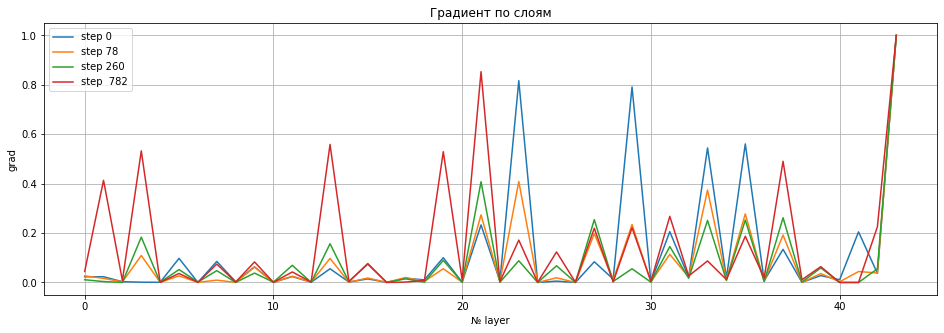

In [ ]:
visual_grad(grad_log=grad_log, numb_layer=grad_log.shape[1])

In [ ]:
model1.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
digits (InputLayer)             [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 26, 26, 64)   640         digits[0][0]                     
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 26, 26, 64)   256         conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 24, 64)   36928       batch_normalization_10[0][0]     
____________________________________________________________________________________________

ResNet50 имеет 25 636 712 весов, а предобученная модель в Keras весит 99 Мб. Точность, которая достигается этой моделью на датасете ImageNet, составляет 75.9%.

InceptionResNetV2 имеет 55 873 736 обучаемых параметров и весит 215 Мб, достигая точности 80.4%.

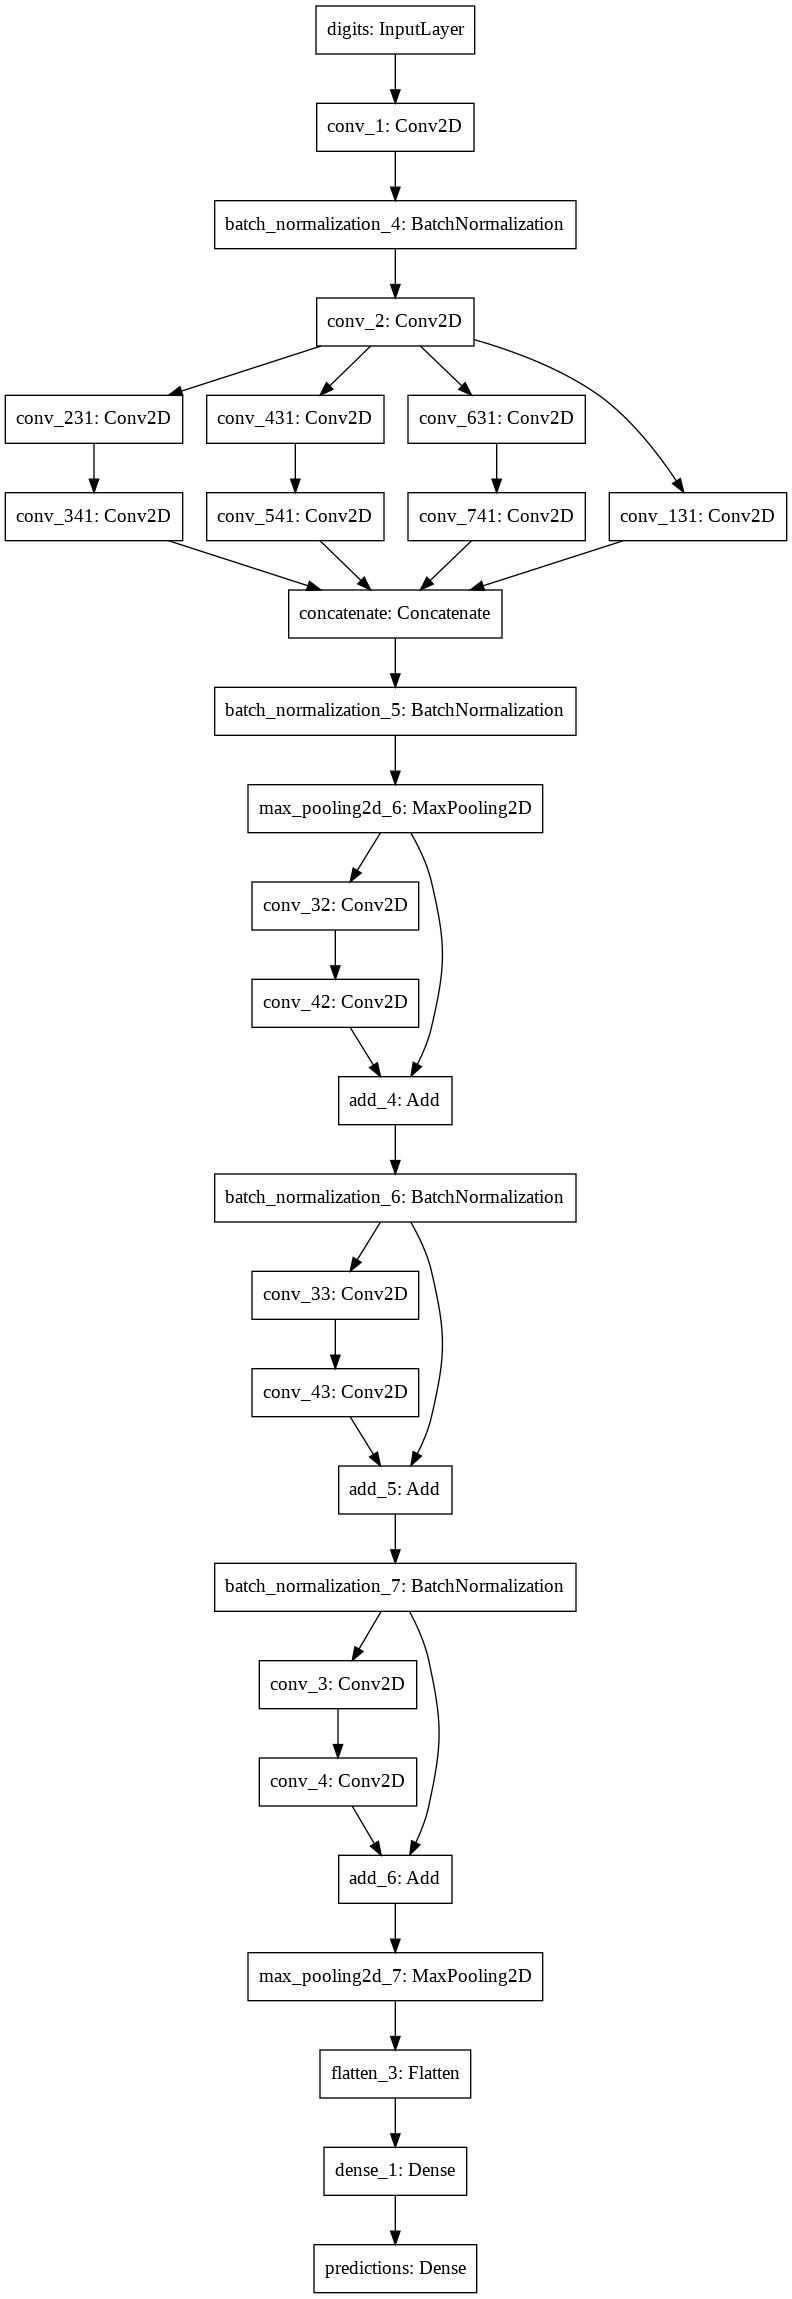

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model1, 'tt.png')